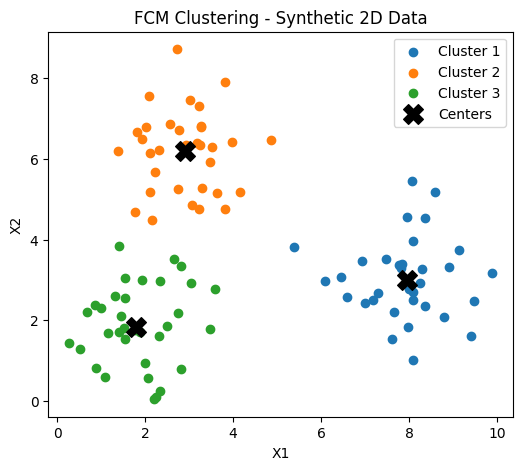

Membership values for 5 random points:
Point [3.05820872 4.8570297 ] -> [0.05417904 0.8077077  0.13811326]
Point [8.09965137 2.49652435] -> [0.98714306 0.00639297 0.00646397]
Point [1.88435172 1.6988963 ] -> [6.61560930e-04 1.19362362e-03 9.98144815e-01]
Point [2.73846658 2.17136828] -> [0.03319474 0.05680197 0.9100033 ]
Point [8.25755039 2.92555408] -> [0.99546153 0.00237012 0.00216835]
Fuzzy Partition Coefficient (FPC): 0.8201
Higher FPC indicates clearer cluster separation.


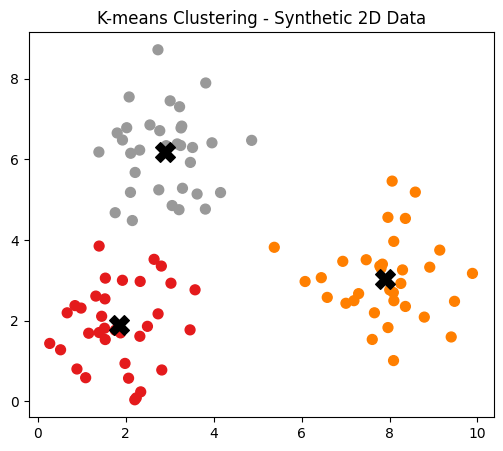


FCM predicted clusters for first 20 samples:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual species labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
FCM Accuracy (majority-mapping): 84.00%
FPC: 0.7065
K-means Accuracy (manual mapping may be needed):  9.333333333333334


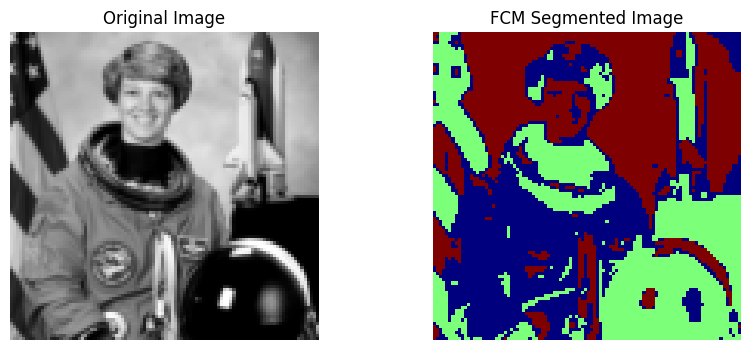

FPC for image segmentation: 0.8337
Customer cluster assignments: [1 2 1 0 2 1 0 1 0 2]
Cluster centers:
 [[0.87141631 0.86909822 0.88606076]
 [0.08497189 0.08840405 0.16286759]
 [0.49128358 0.47619335 0.60878446]]
Membership matrix:
 [[0.00243816 0.06713142 0.01692704 0.51792625 0.01155483 0.04305523
  0.91939224 0.00314448 0.92794778 0.0432223 ]
 [0.98863779 0.39071455 0.93665939 0.04840488 0.00838209 0.72382436
  0.01810443 0.98710708 0.01073927 0.02190677]
 [0.00892405 0.54215403 0.04641357 0.43366887 0.98006308 0.23312041
  0.06250333 0.00974844 0.06131295 0.93487093]]
FPC: 0.7873
K-means customer clusters: [1 2 1 0 0 2 0 1 0 0]
Pakistan: Cluster 1, Memberships: [0.0096069 0.9903931]
India: Cluster 0, Memberships: [0.98638788 0.01361212]
China: Cluster 1, Memberships: [0.2976534 0.7023466]
Iran: Cluster 1, Memberships: [0.25817515 0.74182485]
Afghanistan: Cluster 1, Memberships: [0.03322507 0.96677493]
FPC: 0.8177
K-means clusters: [1 0 1 1 1]


In [21]:
# -*- coding: utf-8 -*-
"""l01c01_introduction_to_colab_and_python.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb
"""

# =========================================================
# Fuzzy C-Means Clustering Lab - Google Colab
# =========================================================

# Install required library
!pip install -q scikit-fuzzy

# Imports
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

# =========================================================
# QUESTION 1: Synthetic 2D dataset
# =========================================================

# Generate synthetic 2D dataset with 3 clusters
np.random.seed(42)
X1, _ = make_blobs(n_samples=100, centers=[[2,2],[8,3],[3,6]], cluster_std=1.0)
X = X1.T  # FCM requires shape (features, samples)

# Apply FCM
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X, c=3, m=2, error=0.005, maxiter=1000, init=None
)

# Plot clusters and centers
cluster_membership = np.argmax(u, axis=0)
plt.figure(figsize=(6,5))
for j in range(3):
    plt.scatter(X[0, cluster_membership==j], X[1, cluster_membership==j], label=f'Cluster {j+1}')
plt.scatter(cntr[:,0], cntr[:,1], marker='X', s=200, c='black', label='Centers')
plt.title("FCM Clustering - Synthetic 2D Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

# Membership values for 5 random points
print("Membership values for 5 random points:")
for i in np.random.choice(X.shape[1], 5, replace=False):
    print(f"Point {X[:,i]} -> {u[:,i]}")

print(f"Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print("Higher FPC indicates clearer cluster separation.")

# Compare with K-means
kmeans = KMeans(n_clusters=3, random_state=42).fit(X.T)
plt.figure(figsize=(6,5))
plt.scatter(X[0,:], X[1,:], c=kmeans.labels_, cmap='Set1', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='X', s=200, c='black')
plt.title("K-means Clustering - Synthetic 2D Data")
plt.show()

# =========================================================
# QUESTION 2: Iris dataset
# =========================================================

iris = load_iris()
X_iris = iris.data.T  # shape (features, samples)
y_iris = iris.target

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data).T

# Apply FCM
cntr_iris, u_iris, _, _, _, _, fpc_iris = fuzz.cluster.cmeans(
    X_scaled, c=3, m=2, error=0.005, maxiter=1000
)

pred_iris = np.argmax(u_iris, axis=0)

# First 20 sample cluster assignments
print("\nFCM predicted clusters for first 20 samples:")
print(pred_iris[:20])
print("Actual species labels:")
print(y_iris[:20])

# Compute accuracy using majority mapping
def fcm_accuracy(pred, true, c):
    from scipy.stats import mode
    acc = 0
    mapping = {}
    for i in range(c):
        mask = (pred==i)
        if np.sum(mask)==0:
            continue
        labels, counts = np.unique(true[mask], return_counts=True)
        mapped_label = labels[np.argmax(counts)]
        mapping[i] = mapped_label
        acc += np.sum(true[mask]==mapped_label)
    return acc/len(true), mapping

acc, mapping = fcm_accuracy(pred_iris, y_iris, 3)
print(f"FCM Accuracy (majority-mapping): {acc*100:.2f}%")
print(f"FPC: {fpc_iris:.4f}")

# Compare with K-means
kmeans_iris = KMeans(n_clusters=3, random_state=42).fit(iris.data)
print("K-means Accuracy (manual mapping may be needed): ", np.mean(kmeans_iris.labels_ == y_iris)*100)

# =========================================================
# QUESTION 3: Grayscale Image Segmentation
# =========================================================

from skimage import data, color
from skimage.transform import resize

# Load grayscale image
img = color.rgb2gray(data.astronaut())
img_small = resize(img, (100,100))  # downsize for speed
pixels = img_small.flatten().reshape(1,-1)  # shape (1, n_pixels)

# Apply FCM with 3 clusters
cntr_img, u_img, _, _, _, _, fpc_img = fuzz.cluster.cmeans(
    pixels, c=3, m=2, error=0.005, maxiter=1000
)

# Assign each pixel to cluster with max membership
segmented = np.argmax(u_img, axis=0).reshape(img_small.shape)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_small, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(segmented, cmap='jet')
plt.title("FCM Segmented Image")
plt.axis('off')
plt.show()

print(f"FPC for image segmentation: {fpc_img:.4f}")

# =========================================================
# QUESTION 4: Market Segmentation (synthetic data)
# =========================================================

# Small customer dataset
customers = np.array([
    [25, 50000, 60],
    [30, 60000, 70],
    [22, 45000, 50],
    [40, 80000, 90],
    [35, 70000, 80],
    [28, 58000, 65],
    [50, 100000, 95],
    [23, 48000, 55],
    [45, 90000, 85],
    [38, 75000, 75]
]).T  # shape (features, samples)

# Normalize
scaler = MinMaxScaler()
customers_scaled = scaler.fit_transform(customers.T).T

# Apply FCM
cntr_cust, u_cust, _, _, _, _, fpc_cust = fuzz.cluster.cmeans(
    customers_scaled, c=3, m=2, error=0.005, maxiter=1000
)

# Assign each customer to cluster with max membership
cust_labels = np.argmax(u_cust, axis=0)
print("Customer cluster assignments:", cust_labels)
print("Cluster centers:\n", cntr_cust)
print("Membership matrix:\n", u_cust)
print(f"FPC: {fpc_cust:.4f}")

# Compare with K-means
kmeans_cust = KMeans(n_clusters=3, random_state=42).fit(customers_scaled.T)
print("K-means customer clusters:", kmeans_cust.labels_)

# =========================================================
# QUESTION 5: COVID-19 Countries Clustering (synthetic example)
# =========================================================

# Simulated COVID-19 data
countries = ["Pakistan","India","China","Iran","Afghanistan"]
covid_data = np.array([
    [500000, 10000, 220000000],  # Pakistan
    [3000000, 40000, 1380000000],  # India
    [90000, 4600, 1440000000],  # China
    [600000, 35000, 83000000],  # Iran
    [150000, 7000, 38000000]  # Afghanistan
]).T  # shape (features, samples)

# Normalize
scaler = MinMaxScaler()
covid_scaled = scaler.fit_transform(covid_data.T).T

# FCM with 2 clusters
cntr_covid, u_covid, _, _, _, _, fpc_covid = fuzz.cluster.cmeans(
    covid_scaled, c=2, m=2, error=0.005, maxiter=1000
)

# Assign cluster labels
covid_labels = np.argmax(u_covid, axis=0)
for i, country in enumerate(countries):
    print(f"{country}: Cluster {covid_labels[i]}, Memberships: {u_covid[:,i]}")

print(f"FPC: {fpc_covid:.4f}")

# Compare with K-means
kmeans_covid = KMeans(n_clusters=2, random_state=42).fit(covid_scaled.T)
print("K-means clusters:", kmeans_covid.labels_)